In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
df_raw = pd.read_csv('Train.csv')

In [3]:
df_raw.head()

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume
0,2012-10-02 09:00:00,None,121,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,scattered clouds,5545
1,2012-10-02 10:00:00,None,178,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,broken clouds,4516
2,2012-10-02 11:00:00,None,113,66,3,329,2,2,289.58,0.0,0.0,90,Clouds,overcast clouds,4767
3,2012-10-02 12:00:00,None,20,66,3,329,5,5,290.13,0.0,0.0,90,Clouds,overcast clouds,5026
4,2012-10-02 13:00:00,None,281,65,3,329,7,7,291.14,0.0,0.0,75,Clouds,broken clouds,4918


In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33750 entries, 0 to 33749
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date_time            33750 non-null  object 
 1   is_holiday           33750 non-null  object 
 2   air_pollution_index  33750 non-null  int64  
 3   humidity             33750 non-null  int64  
 4   wind_speed           33750 non-null  int64  
 5   wind_direction       33750 non-null  int64  
 6   visibility_in_miles  33750 non-null  int64  
 7   dew_point            33750 non-null  int64  
 8   temperature          33750 non-null  float64
 9   rain_p_h             33750 non-null  float64
 10  snow_p_h             33750 non-null  float64
 11  clouds_all           33750 non-null  int64  
 12  weather_type         33750 non-null  object 
 13  weather_description  33750 non-null  object 
 14  traffic_volume       33750 non-null  int64  
dtypes: float64(3), int64(8), object(4)
m

In [5]:
df_raw['is_holiday'].nunique()

12

In [6]:
df_raw['weather_description'].nunique()

38

In [7]:
df_raw['weather_type'].nunique()

11

In [8]:
# Convert it to datetime format
df_raw['date_time'] = pd.to_datetime(df_raw['date_time'])

df_raw['hour'] = df_raw['date_time'].dt.hour

# Set 'date_time' as the index
df_raw.set_index('date_time', inplace=True)

In [9]:
df_raw.head()

,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume,hour
date_time,,,,,,,,,,,,,,,
2012-10-02 09:00:00,None,121,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,scattered clouds,5545,9
2012-10-02 10:00:00,None,178,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,broken clouds,4516,10
2012-10-02 11:00:00,None,113,66,3,329,2,2,289.58,0.0,0.0,90,Clouds,overcast clouds,4767,11
2012-10-02 12:00:00,None,20,66,3,329,5,5,290.13,0.0,0.0,90,Clouds,overcast clouds,5026,12
2012-10-02 13:00:00,None,281,65,3,329,7,7,291.14,0.0,0.0,75,Clouds,broken clouds,4918,13


In [10]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 33750 entries, 2012-10-02 09:00:00 to 2017-05-17 23:00:00
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   is_holiday           33750 non-null  object 
 1   air_pollution_index  33750 non-null  int64  
 2   humidity             33750 non-null  int64  
 3   wind_speed           33750 non-null  int64  
 4   wind_direction       33750 non-null  int64  
 5   visibility_in_miles  33750 non-null  int64  
 6   dew_point            33750 non-null  int64  
 7   temperature          33750 non-null  float64
 8   rain_p_h             33750 non-null  float64
 9   snow_p_h             33750 non-null  float64
 10  clouds_all           33750 non-null  int64  
 11  weather_type         33750 non-null  object 
 12  weather_description  33750 non-null  object 
 13  traffic_volume       33750 non-null  int64  
 14  hour                 33750 non-null  int64  
dtypes

In [11]:
df_is_holiday = pd.get_dummies(df_raw['is_holiday'])

In [12]:
df_is_holiday.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 33750 entries, 2012-10-02 09:00:00 to 2017-05-17 23:00:00
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Christmas Day              33750 non-null  uint8
 1   Columbus Day               33750 non-null  uint8
 2   Independence Day           33750 non-null  uint8
 3   Labor Day                  33750 non-null  uint8
 4   Martin Luther King Jr Day  33750 non-null  uint8
 5   Memorial Day               33750 non-null  uint8
 6   New Years Day              33750 non-null  uint8
 7   None                       33750 non-null  uint8
 8   State Fair                 33750 non-null  uint8
 9   Thanksgiving Day           33750 non-null  uint8
 10  Veterans Day               33750 non-null  uint8
 11  Washingtons Birthday       33750 non-null  uint8
dtypes: uint8(12)
memory usage: 659.2 KB


In [13]:
df_weather_type = pd.get_dummies(df_raw['weather_type'])

In [14]:
df_weather_type.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 33750 entries, 2012-10-02 09:00:00 to 2017-05-17 23:00:00
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Clear         33750 non-null  uint8
 1   Clouds        33750 non-null  uint8
 2   Drizzle       33750 non-null  uint8
 3   Fog           33750 non-null  uint8
 4   Haze          33750 non-null  uint8
 5   Mist          33750 non-null  uint8
 6   Rain          33750 non-null  uint8
 7   Smoke         33750 non-null  uint8
 8   Snow          33750 non-null  uint8
 9   Squall        33750 non-null  uint8
 10  Thunderstorm  33750 non-null  uint8
dtypes: uint8(11)
memory usage: 626.2 KB


In [15]:
df_weather_description = pd.get_dummies(df_raw['weather_description'])

In [16]:
df_weather_description.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 33750 entries, 2012-10-02 09:00:00 to 2017-05-17 23:00:00
Data columns (total 38 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   SQUALLS                              33750 non-null  uint8
 1   Sky is Clear                         33750 non-null  uint8
 2   broken clouds                        33750 non-null  uint8
 3   drizzle                              33750 non-null  uint8
 4   few clouds                           33750 non-null  uint8
 5   fog                                  33750 non-null  uint8
 6   freezing rain                        33750 non-null  uint8
 7   haze                                 33750 non-null  uint8
 8   heavy intensity drizzle              33750 non-null  uint8
 9   heavy intensity rain                 33750 non-null  uint8
 10  heavy snow                           33750 non-null  uint8
 11  light intensity dri

In [17]:
df_processed = pd.concat([df_raw, df_is_holiday, df_weather_type, df_weather_description], axis=1)

In [18]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 33750 entries, 2012-10-02 09:00:00 to 2017-05-17 23:00:00
Data columns (total 76 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   is_holiday                           33750 non-null  object 
 1   air_pollution_index                  33750 non-null  int64  
 2   humidity                             33750 non-null  int64  
 3   wind_speed                           33750 non-null  int64  
 4   wind_direction                       33750 non-null  int64  
 5   visibility_in_miles                  33750 non-null  int64  
 6   dew_point                            33750 non-null  int64  
 7   temperature                          33750 non-null  float64
 8   rain_p_h                             33750 non-null  float64
 9   snow_p_h                             33750 non-null  float64
 10  clouds_all                           33750 non-null  int64 

In [19]:
df_processed.drop(columns=['is_holiday', 'weather_type', 'weather_description'], inplace=True)

In [20]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 33750 entries, 2012-10-02 09:00:00 to 2017-05-17 23:00:00
Data columns (total 73 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   air_pollution_index                  33750 non-null  int64  
 1   humidity                             33750 non-null  int64  
 2   wind_speed                           33750 non-null  int64  
 3   wind_direction                       33750 non-null  int64  
 4   visibility_in_miles                  33750 non-null  int64  
 5   dew_point                            33750 non-null  int64  
 6   temperature                          33750 non-null  float64
 7   rain_p_h                             33750 non-null  float64
 8   snow_p_h                             33750 non-null  float64
 9   clouds_all                           33750 non-null  int64  
 10  traffic_volume                       33750 non-null  int64 

In [21]:
df_target = df_processed['traffic_volume']

In [22]:
df_target

date_time
2012-10-02 09:00:00    5545
2012-10-02 10:00:00    4516
2012-10-02 11:00:00    4767
2012-10-02 12:00:00    5026
2012-10-02 13:00:00    4918
                       ... 
2017-05-17 21:00:00    2348
2017-05-17 22:00:00    2194
2017-05-17 22:00:00    2194
2017-05-17 23:00:00    1328
2017-05-17 23:00:00    1328
Name: traffic_volume, Length: 33750, dtype: int64

In [23]:
df_processed.drop(columns=['traffic_volume'], inplace=True)

In [24]:
df_processed['traffic_volume'] = df_target

In [25]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 33750 entries, 2012-10-02 09:00:00 to 2017-05-17 23:00:00
Data columns (total 73 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   air_pollution_index                  33750 non-null  int64  
 1   humidity                             33750 non-null  int64  
 2   wind_speed                           33750 non-null  int64  
 3   wind_direction                       33750 non-null  int64  
 4   visibility_in_miles                  33750 non-null  int64  
 5   dew_point                            33750 non-null  int64  
 6   temperature                          33750 non-null  float64
 7   rain_p_h                             33750 non-null  float64
 8   snow_p_h                             33750 non-null  float64
 9   clouds_all                           33750 non-null  int64  
 10  hour                                 33750 non-null  int64 

In [26]:
scaler = StandardScaler()
scaler = scaler.fit(df_processed)
df_processed_scaled = scaler.transform(df_processed)

In [27]:
df_processed_scaled

array([[-0.40415257,  1.05572004, -0.67040489, ..., -0.0261141 ,
        -0.02310017,  1.15738423],
       [ 0.27657226, -0.2497631 , -0.18396715, ..., -0.0261141 ,
        -0.02310017,  0.64067732],
       [-0.4996929 , -0.30910324, -0.18396715, ..., -0.0261141 ,
        -0.02310017,  0.76671564],
       ...,
       [-0.20112938, -0.07174267, -1.15684263, ..., -0.0261141 ,
        -0.02310017, -0.52530271],
       [ 0.88564185, -0.30910324, -1.15684263, ..., -0.0261141 ,
        -0.02310017, -0.96016003],
       [-0.17724429, -0.48712367, -1.15684263, ..., -0.0261141 ,
        -0.02310017, -0.96016003]])

In [28]:
trainX = []
trainY = []

In [29]:
selected_features = ['traffic_volume', 'hour', 'temperature', 'clouds_all', 'humidity']
df_selected = df_raw[selected_features]

scaler = StandardScaler()
df_processed_scaled = scaler.fit_transform(df_selected)

In [30]:
n_future = 1   # Number of data we want to look into the future based on the past data.
n_past = 14  # Number of past data we want to use to predict the future.

In [31]:
for i in range(n_past, len(df_processed_scaled) - n_future + 1):
    trainX.append(df_processed_scaled[i - n_past:i, :-1])
    trainY.append(df_processed_scaled[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

In [32]:
print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (33736, 14, 4).
trainY shape == (33736, 1).


In [33]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 14, 64)            17664     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 30,113
Trainable params: 30,113
Non-trainable params: 0
_________________________________________________________________


Epoch 1/5
1898/1898 [==============================] - 24s 11ms/step - loss: 0.2160 - val_loss: 0.0771
Epoch 2/5
1898/1898 [==============================] - 21s 11ms/step - loss: 0.1127 - val_loss: 0.0688
Epoch 3/5
1898/1898 [==============================] - 21s 11ms/step - loss: 0.1030 - val_loss: 0.0599
Epoch 4/5
1898/1898 [==============================] - 21s 11ms/step - loss: 0.0981 - val_loss: 0.0762
Epoch 5/5
1898/1898 [==============================] - 21s 11ms/step - loss: 0.0932 - val_loss: 0.0516


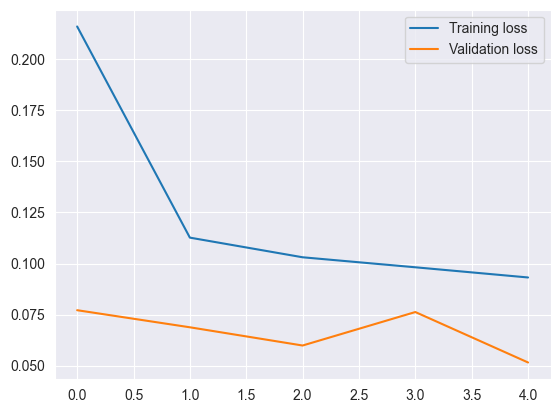

In [34]:
# Fit the model
history = model.fit(trainX, trainY, epochs=5, batch_size=16, validation_split=0.1, verbose=1)

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [35]:
df_raw = pd.read_csv('Train.csv')

In [36]:
#Separate dates for future plotting
train_dates = pd.to_datetime(df_raw['date_time'])
print(train_dates.tail(30)) #Check last few dates.

33720   2017-05-17 10:00:00
33721   2017-05-17 10:00:00
33722   2017-05-17 11:00:00
33723   2017-05-17 12:00:00
33724   2017-05-17 12:00:00
33725   2017-05-17 13:00:00
33726   2017-05-17 13:00:00
33727   2017-05-17 14:00:00
33728   2017-05-17 15:00:00
33729   2017-05-17 16:00:00
33730   2017-05-17 16:00:00
33731   2017-05-17 17:00:00
33732   2017-05-17 17:00:00
33733   2017-05-17 18:00:00
33734   2017-05-17 18:00:00
33735   2017-05-17 18:00:00
33736   2017-05-17 18:00:00
33737   2017-05-17 19:00:00
33738   2017-05-17 19:00:00
33739   2017-05-17 19:00:00
33740   2017-05-17 20:00:00
33741   2017-05-17 20:00:00
33742   2017-05-17 20:00:00
33743   2017-05-17 21:00:00
33744   2017-05-17 21:00:00
33745   2017-05-17 21:00:00
33746   2017-05-17 22:00:00
33747   2017-05-17 22:00:00
33748   2017-05-17 23:00:00
33749   2017-05-17 23:00:00
Name: date_time, dtype: datetime64[ns]


In [37]:
n_days_for_prediction=200

In [38]:
prediction = model.predict(trainX[-n_days_for_prediction:])

7/7 [==============================] - 0s 5ms/step


In [39]:
true = trainY[-n_days_for_prediction:]

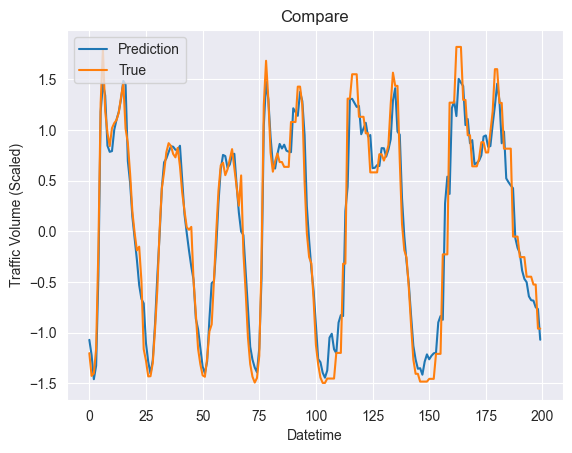

In [40]:
# Plot the training and validation accuracy
plt.plot(prediction)
plt.plot(true)
plt.title('Compare')
plt.xlabel('Datetime')
plt.ylabel('Traffic Volume (Scaled)')
plt.legend(['Prediction','True'], loc='upper left')
plt.show()

In [41]:
prediction_copies = np.repeat(prediction, df_selected.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:, -1]

ValueError: operands could not be broadcast together with shapes (200,73) (5,) (200,73) 

In [ ]:
y_pred_future

In [ ]:
true = df_raw['traffic_volume'][-n_days_for_prediction:].values

In [ ]:
true

In [ ]:
# Plot the training and validation accuracy
plt.plot(y_pred_future)
plt.plot(true)
plt.title('Compare')
plt.xlabel('Datetime')
plt.ylabel('Traffic Volume (Unscaled)')
plt.legend(['Prediction','True'], loc='upper left')
plt.show()

# Modeling

In [42]:
print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (33736, 14, 4).
trainY shape == (33736, 1).


In [43]:
total_samples = trainX.shape[0]
split_index = int(total_samples * 0.8)

X_train = trainX[:split_index]
y_train = trainY[:split_index]
X_test = trainX[split_index:]
y_test = trainY[split_index:]

In [44]:
len(X_train)

26988

In [45]:
len(X_test)

6748

In [46]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 14, 64)            17664     
                                                                 
 lstm_3 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 30,113
Trainable params: 30,113
Non-trainable params: 0
_________________________________________________________________


Epoch 1/5
1519/1519 [==============================] - 22s 12ms/step - loss: 0.2036 - val_loss: 0.0674
Epoch 2/5
1519/1519 [==============================] - 19s 13ms/step - loss: 0.1254 - val_loss: 0.0470
Epoch 3/5
1519/1519 [==============================] - 17s 12ms/step - loss: 0.1106 - val_loss: 0.0460
Epoch 4/5
1519/1519 [==============================] - 17s 11ms/step - loss: 0.1048 - val_loss: 0.0544
Epoch 5/5
1519/1519 [==============================] - 17s 11ms/step - loss: 0.1009 - val_loss: 0.0528


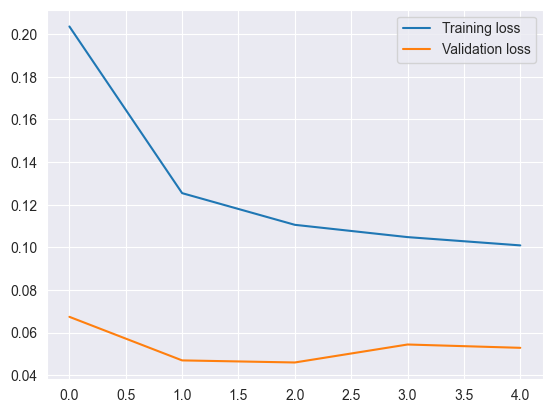

In [47]:
# fit the model
history = model.fit(X_train, y_train, epochs=5, batch_size=16, validation_split=0.1, verbose=1)

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [48]:
prediction = model.predict(X_test)

211/211 [==============================] - 1s 5ms/step


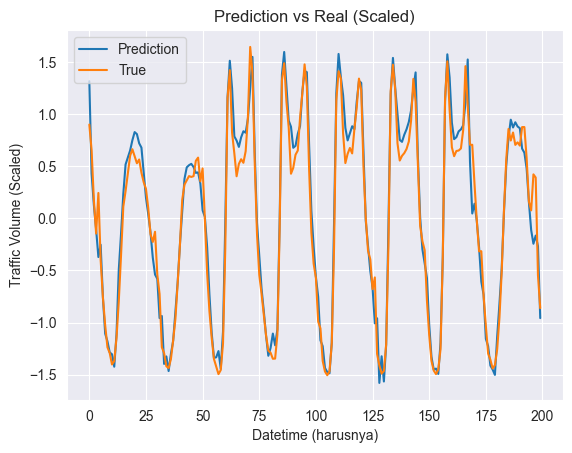

In [49]:
# Plot the training and validation accuracy
plt.plot(prediction[:200])
plt.plot(y_test[:200])
plt.title('Prediction vs Real (Scaled)')
plt.xlabel('Datetime (harusnya)')
plt.ylabel('Traffic Volume (Scaled)')
plt.legend(['Prediction','True'], loc='upper left')
plt.show()

In [50]:
# Evaluate the model on train set
train_prediction = model.predict(X_train)
train_mse = np.mean((train_prediction - y_train) ** 2)
train_rmse = np.sqrt(train_mse)
train_mae = np.mean(np.abs(train_prediction - y_train))
train_r2 = 1 - (np.sum((y_train - train_prediction) ** 2) / np.sum((y_train - y_train.mean()) ** 2))

# Evaluate the model on test set
test_prediction = model.predict(X_test)
test_mse = np.mean((test_prediction - y_test) ** 2)
test_rmse = np.sqrt(test_mse)
test_mae = np.mean(np.abs(test_prediction - y_test))
test_r2 = 1 - (np.sum((y_test - test_prediction) ** 2) / np.sum((y_test - y_test.mean()) ** 2))

print("Train MSE:", train_mse)
print("Train RMSE:", train_rmse)
print("Train MAE:", train_mae)
print("Train R2:", train_r2)

print("Test MSE:", test_mse)
print("Test RMSE:", test_rmse)
print("Test MAE:", test_mae)
print("Test R2:", test_r2)

211/211 [==============================] - 1s 5ms/step
Train MSE: 0.07337308263718255
Train RMSE: 0.2708746622280913
Train MAE: 0.1717351499973881
Train R2: 0.9272946345196513
Test MSE: 0.04811274929918528
Test RMSE: 0.21934618596908695
Test MAE: 0.1507340667074795
Test R2: 0.9500411820510752


In [51]:
prediction_copies = np.repeat(prediction, df_selected.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:, 0]

In [52]:
y_pred_future

array([5855.291 , 4095.3438, 3495.1199, ..., 1823.0552, 1803.8734,
       1064.5195], dtype=float32)

In [53]:
true_value = df_raw['traffic_volume'][split_index+14:].values

In [54]:
len(df_raw['traffic_volume'])

33750

In [55]:
len(trainY)

33736

In [56]:
true_value

array([5028, 4540, 3593, ..., 2194, 1328, 1328], dtype=int64)

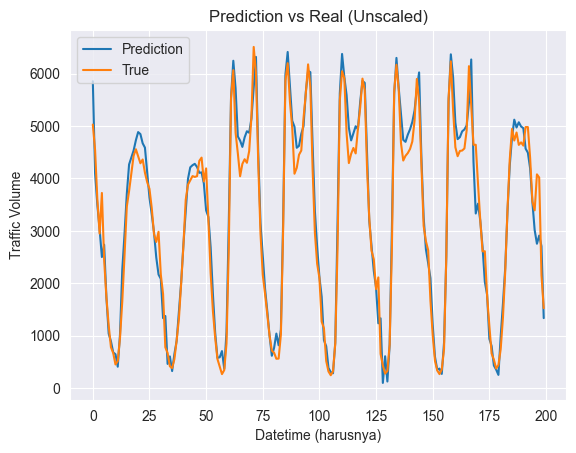

In [57]:
# Plot Prediction vs Real Data
plt.plot(y_pred_future[:200])
plt.plot(true_value[:200])
plt.title('Prediction vs Real (Unscaled)')
plt.xlabel('Datetime (harusnya)')
plt.ylabel('Traffic Volume')
plt.legend(['Prediction','True'], loc='upper left')
plt.show()

In [ ]:
model.save('XAI_1.h5')

In [ ]:
df_raw.info()

In [ ]:
df_raw.tail()

In [ ]:
df_test_raw = pd.read_csv('Test.csv')

In [ ]:
df_test_raw.info()

In [ ]:
# Convert it to datetime format
df_test_raw['date_time'] = pd.to_datetime(df_test_raw['date_time'])

# Set 'date_time' as the index
df_test_raw.set_index('date_time', inplace=True)

In [ ]:
df_test_raw.head()

In [ ]:
df_is_holiday = pd.get_dummies(df_test_raw['is_holiday'])
df_weather_type = pd.get_dummies(df_test_raw['weather_type'])
df_weather_description = pd.get_dummies(df_test_raw['weather_description'])

In [ ]:
df_test_processed = pd.concat([df_test_raw, df_is_holiday, df_weather_type, df_weather_description], axis=1)

In [ ]:
df_test_processed.info()

In [ ]:
df_processed.info()

In [ ]:
df_test_processed.drop(columns=['is_holiday', 'weather_type', 'weather_description'], inplace=True)

In [ ]:
train_columns = df_processed.columns
test_columns = df_test_processed.columns

In [ ]:
diff = []
for i, col in enumerate(train_columns):
  if col not in test_columns:
    diff.append([i, col])

In [ ]:
diff

In [ ]:
length = df_test_processed.shape[0]
zero_array = np.zeros(length)

In [ ]:
for col in diff:
  df_test_processed.insert(col[0], col[1], zero_array)

In [ ]:
df_test_processed.info()

In [ ]:
df_raya = df_test_processed.copy()